<a href="https://colab.research.google.com/github/Nyakatodianah/Prediction-of-Product-Sales/blob/main/PROJECT_ONE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content.drive')

Drive already mounted at /content.drive; to attempt to forcibly remount, call drive.mount("/content.drive", force_remount=True).


### **import neccessary libraries and algorithms**

In [4]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

##**loading data**

In [5]:
filepath = '/content/sales_predictions_2023 (4).csv'
sales_data  = pd.read_csv(filepath)
sales_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


##**Data Cleaning**

In [6]:
#drop columns that have no effect on our analysis
print(sales_data.columns)


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


In [7]:
#dropping columns that have no effect on our analysis
columns_to_drop = ['Outlet_Location_Type', 'Outlet_Type', 'Outlet_Size', 'Outlet_Identifier', 'Item_Identifier','Outlet_Establishment_Year']
sales_data = sales_data.drop(columns=columns_to_drop)
print(sales_data)

      Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
0           9.300          Low Fat         0.016047                  Dairy   
1           5.920          Regular         0.019278            Soft Drinks   
2          17.500          Low Fat         0.016760                   Meat   
3          19.200          Regular         0.000000  Fruits and Vegetables   
4           8.930          Low Fat         0.000000              Household   
...           ...              ...              ...                    ...   
8518        6.865          Low Fat         0.056783            Snack Foods   
8519        8.380          Regular         0.046982           Baking Goods   
8520       10.600          Low Fat         0.035186     Health and Hygiene   
8521        7.210          Regular         0.145221            Snack Foods   
8522       14.800          Low Fat         0.044878            Soft Drinks   

      Item_MRP  Item_Outlet_Sales  
0     249.8092          373

In [8]:
#checking for missing values
sales_data.isnull().sum()

Item_Weight          1463
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Item_Outlet_Sales       0
dtype: int64

In [9]:
# Define numeric and categorical columns
numeric_columns = sales_data.select_dtypes(include=['float', 'int'])
categorical_columns = sales_data.select_dtypes(include='object')

# Imputation for numeric columns
numeric_imputer = SimpleImputer(strategy='mean')
numeric_imputed = numeric_imputer.fit_transform(numeric_columns)
# Assign imputed values back to the DataFrame
sales_data[numeric_columns.columns] = numeric_imputed

# Imputation for categorical columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
categorical_imputed = categorical_imputer.fit_transform(categorical_columns)
# Assign imputed values back to the DataFrame
sales_data[categorical_columns.columns] = categorical_imputed

numeric_imputed_df = pd.DataFrame(numeric_imputed, columns=numeric_columns.columns)
categorical_imputed_df = pd.DataFrame(categorical_imputed, columns=categorical_columns.columns)

# Concatenate numeric and categorical imputed DataFrames
imputed_data = pd.concat([numeric_imputed_df, categorical_imputed_df], axis=1)
sales_data = imputed_data

In [10]:
#check if there are still missing values
sales_data.isnull().sum()

Item_Weight          0
Item_Visibility      0
Item_MRP             0
Item_Outlet_Sales    0
Item_Fat_Content     0
Item_Type            0
dtype: int64

In [11]:
#checking and dropping duplicated
sales_data.duplicated()
sales_data.drop_duplicates()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content,Item_Type
0,9.300,0.016047,249.8092,3735.1380,Low Fat,Dairy
1,5.920,0.019278,48.2692,443.4228,Regular,Soft Drinks
2,17.500,0.016760,141.6180,2097.2700,Low Fat,Meat
3,19.200,0.000000,182.0950,732.3800,Regular,Fruits and Vegetables
4,8.930,0.000000,53.8614,994.7052,Low Fat,Household
...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,2778.3834,Low Fat,Snack Foods
8519,8.380,0.046982,108.1570,549.2850,Regular,Baking Goods
8520,10.600,0.035186,85.1224,1193.1136,Low Fat,Health and Hygiene
8521,7.210,0.145221,103.1332,1845.5976,Regular,Snack Foods


In [12]:
#checking and removing NaNs
sales_data.isna().sum()

Item_Weight          0
Item_Visibility      0
Item_MRP             0
Item_Outlet_Sales    0
Item_Fat_Content     0
Item_Type            0
dtype: int64

In [13]:
#checking and handling inconsistencies
sales_data.nunique()

Item_Weight           416
Item_Visibility      7880
Item_MRP             5938
Item_Outlet_Sales    3493
Item_Fat_Content        5
Item_Type              16
dtype: int64

In [14]:
unique_values = sales_data['Item_Visibility'].unique()
print(unique_values)


[0.0160473  0.01927822 0.01676007 ... 0.03518627 0.14522065 0.04487828]


In [15]:
sales_data['Item_Fat_Content'] = sales_data['Item_Fat_Content'].str.lower()

sales_data['Item_Fat_Content'].replace({'low fat': 'low fat', 'lf': 'low fat', 'reg': 'regular'}, inplace=True)
sales_data['Item_Fat_Content']

0       low fat
1       regular
2       low fat
3       regular
4       low fat
         ...   
8518    low fat
8519    regular
8520    low fat
8521    regular
8522    low fat
Name: Item_Fat_Content, Length: 8523, dtype: object

### **Data** **Visualisation**

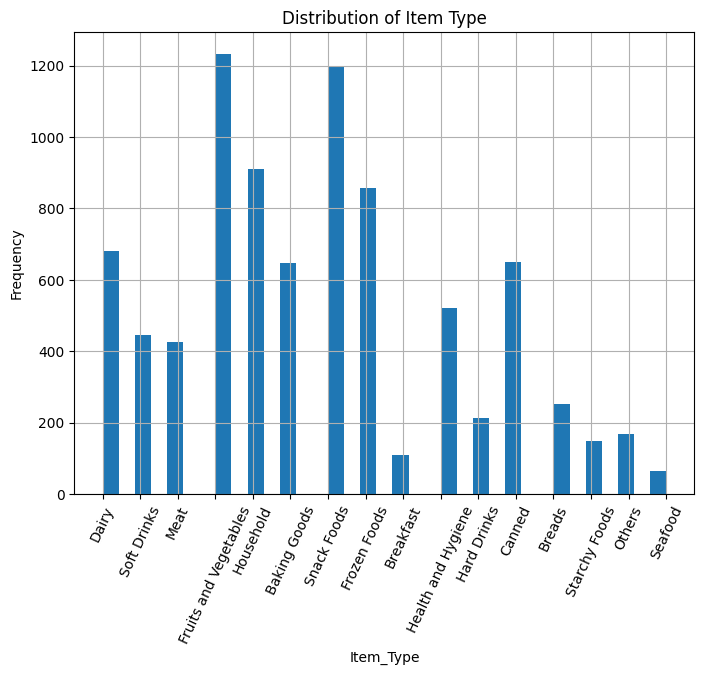

In [16]:
#Histogram showing Item Type
plt.figure(figsize = (8,6))
plt.hist(x='Item_Type',bins= 35, data = sales_data)
plt.title('Distribution of Item Type')
plt.xlabel('Item_Type')
plt.ylabel('Frequency')
plt.xticks(rotation=65)
plt.grid(True)
plt.show()

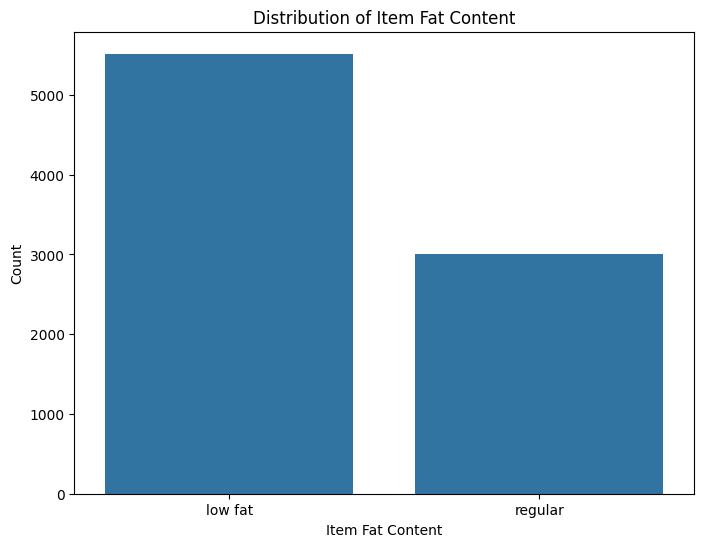

In [17]:
# Bar plot for Item_Fat_Content
plt.figure(figsize=(8, 6))
sns.countplot(x='Item_Fat_Content', data=sales_data)
plt.title('Distribution of Item Fat Content')
plt.xlabel('Item Fat Content')
plt.ylabel('Count')
plt.show()

More Items have a low fat Content  compared to regular fat content

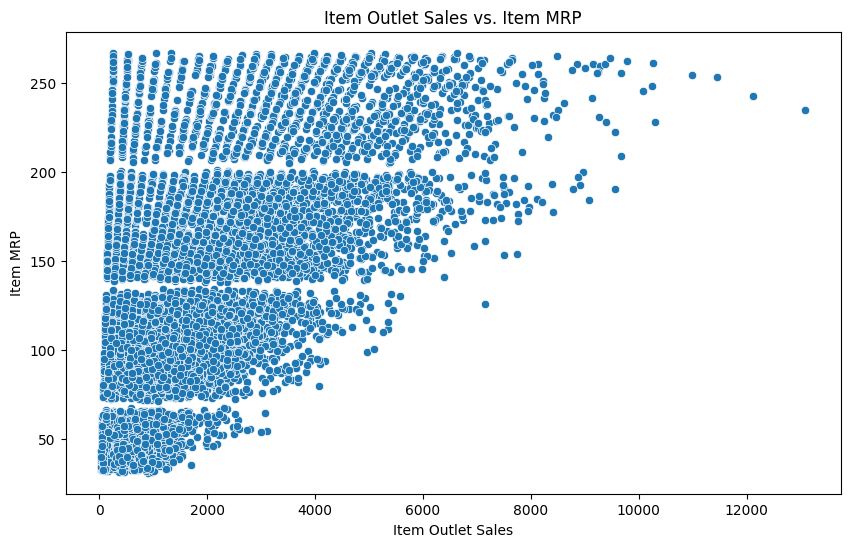

In [18]:
# Scatter plot for Item_Outlet_Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item_Outlet_Sales', y='Item_MRP', data=sales_data)
plt.title('Item Outlet Sales vs. Item MRP')
plt.xlabel('Item Outlet Sales')
plt.ylabel('Item MRP')
plt.show()

There is a positive correlation between Item Maximum Retail Price and Item Outlet Sales.

## **Label Encode Categorical Variables**

In [19]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
labelencoder = LabelEncoder()

# Encode the 'Item_Type' column
sales_data['Item_Type'] = labelencoder.fit_transform(sales_data['Item_Type'])

# Display the encoded values
print(sales_data['Item_Type'])

# Encode the 'Item_Fat_Content' column
sales_data['Item_Fat_Content'] = labelencoder.fit_transform(sales_data['Item_Fat_Content'])
# Display the encoded values
print(sales_data['Item_Fat_Content'])

0        4
1       14
2       10
3        6
4        9
        ..
8518    13
8519     0
8520     8
8521    13
8522    14
Name: Item_Type, Length: 8523, dtype: int64
0       0
1       1
2       0
3       1
4       0
       ..
8518    0
8519    1
8520    0
8521    1
8522    0
Name: Item_Fat_Content, Length: 8523, dtype: int64


## **Data Splitting**

In [20]:
X = sales_data.drop(columns = ['Item_Outlet_Sales'])
y = sales_data['Item_Outlet_Sales']
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25, random_state=42)
print(X_train.shape[0] / X.shape[0]*100)
print(X_test.shape[0] / X.shape[0] *100)
print(y_train.shape)
print(y_test.shape)

74.99706676053033
25.00293323946967
(6392,)
(2131,)


In [21]:
X_train

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content,Item_Type
4776,16.350,0.029565,256.4646,0,9
7510,15.250,0.000000,179.7660,1,13
5828,12.350,0.158716,157.2946,1,10
5327,7.975,0.014628,82.3250,0,0
4810,19.350,0.016645,120.9098,0,5
...,...,...,...,...,...
5734,9.395,0.286345,139.1838,1,6
5191,15.600,0.117575,75.6670,0,5
5390,17.600,0.018944,237.3590,0,8
860,20.350,0.054363,117.9466,0,13


In [22]:
y_train

4776     515.3292
7510    3056.0220
5828    1577.9460
5327    1331.6000
4810    1687.1372
          ...    
5734     280.9676
5191    1301.6390
5390    6145.3340
860     1649.8524
7270     965.4100
Name: Item_Outlet_Sales, Length: 6392, dtype: float64

In [23]:
y_test

7503    1743.0644
2957     356.8688
7031     377.5086
1084    5778.4782
856     2356.9320
          ...    
4753    3793.7284
4836    2410.8618
8064    5309.7550
4418    2530.7058
1784    4138.6128
Name: Item_Outlet_Sales, Length: 2131, dtype: float64

In [24]:
X_test

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content,Item_Type
7503,14.300000,0.026300,79.4302,0,5
2957,7.930000,0.071136,42.7086,0,8
7031,14.500000,0.041313,42.0454,1,3
1084,12.857645,0.044767,173.7054,1,14
856,10.195000,0.012456,197.5110,1,10
...,...,...,...,...,...
4753,17.600000,0.007994,171.6422,0,4
4836,10.195000,0.000000,143.1154,0,5
8064,8.100000,0.128296,210.4902,0,6
4418,6.590000,0.026226,119.0098,0,9


## **Model Building**

In [25]:
# Define numeric and categorical columns
numeric_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP']
categorical_columns = ['Item_Fat_Content', 'Item_Type']

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_columns),
    ('cat', OneHotEncoder(), categorical_columns)
])
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['Item_Weight', 'Item_Visibility',
                                  'Item_MRP']),
                                ('cat', OneHotEncoder(),
                                 ['Item_Fat_Content', 'Item_Type'])])

In [26]:
# Define pipeline with preprocessor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
])
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Item_Weight',
                                                   'Item_Visibility',
                                                   'Item_MRP']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Item_Fat_Content',
                                                   'Item_Type'])]))])

In [27]:
# Fit the pipeline with the training data
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Item_Weight',
                                                   'Item_Visibility',
                                                   'Item_MRP']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Item_Fat_Content',
                                                   'Item_Type'])]))])

In [28]:
#Evaluate the Model(linear regression)
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

In [29]:
#make predictions
pred = linear_model.predict(X_test)
print(pred)

[1384.41080225  627.71226398  812.69472474 ... 2985.08373947 2018.75033168
 2465.96397165]


In [30]:
#calculating the coefficient of determination R squared of a linear regression model
linear_model.score(X_test,pred)

1.0